# Tales from the Crypto

---


## 1. Sentiment Analysis

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
from newsapi import NewsApiClient
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\dlevs\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!

Bad key "text.kerning_factor" on line 4 in
C:\Users\dlevs\Anaconda3\envs\pyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
# Read your api key environment variable
load_dotenv()
api_key = os.getenv("NEWS_API_KEY")

In [3]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [4]:
# Fetch the Bitcoin news articles
bitcoin_news_en = newsapi.get_everything(
    q="Bitcoin",
    language="en"
)

# Show the total number of news
bitcoin_news_en["totalResults"]

4734

In [5]:
# Fetch the Ethereum news articles
ethereum_news_en = newsapi.get_everything(
    q="Ethereum",
    language="en"
)

# Show the total number of news
ethereum_news_en["totalResults"]

1311

In [6]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_sentiments = []

for article in bitcoin_news_en["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
bitcoin_df = pd.DataFrame(bitcoin_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
bitcoin_df = bitcoin_df[cols]

bitcoin_df.head()

,date,text,compound,positive,negative,neutral
0,2020-11-12,A former Microsoft software engineer from Ukra...,-0.6705,0.064,0.199,0.737
1,2020-12-03,Visa has partnered with cryptocurrency startup...,0.6369,0.162,0.000,0.838
2,2020-11-12,PayPal is bringing its newly-announced support...,0.2144,0.053,0.000,0.947
3,2020-11-20,"In November 2017, after an absolutely massive,...",0.2023,0.050,0.000,0.950
4,2020-12-06,"Unlike ‘conventional’ cryptocurrencies, a cent...",0.0000,0.000,0.000,1.000


In [7]:
# Create the Ethereum sentiment scores DataFrame
ethereum_sentiments = []

for article in ethereum_news_en["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ethereum_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
ethereum_df = pd.DataFrame(ethereum_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
ethereum_df = ethereum_df[cols]

ethereum_df.head()

,date,text,compound,positive,negative,neutral
0,2020-11-12,PayPal is bringing its newly-announced support...,0.2144,0.053,0.0,0.947
1,2020-11-23,FILE PHOTO: Representation of the Ethereum vir...,0.0000,0.000,0.0,1.000
2,2020-11-23,FILE PHOTO: Representation of the Ethereum vir...,0.0000,0.000,0.0,1.000
3,2020-11-23,LONDON (Reuters) - Digital currencies Ethereum...,0.4215,0.088,0.0,0.912
4,2020-12-07,NEW YORK (Reuters) - Institutional investors p...,0.1779,0.052,0.0,0.948


In [8]:
# Describe the Bitcoin Sentiment
bitcoin_df.describe()

,compound,positive,negative,neutral
count,19.000000,19.000000,19.000000,19.000000
mean,0.170479,0.056895,0.014421,0.928684
std,0.328269,0.066958,0.047886,0.087898
min,-0.670500,0.000000,0.000000,0.737000
25%,0.000000,0.000000,0.000000,0.860500
50%,0.000000,0.050000,0.000000,0.950000
75%,0.411700,0.102500,0.000000,1.000000
max,0.765000,0.174000,0.199000,1.000000


In [9]:
# Describe the Ethereum Sentiment
ethereum_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.122565,0.060950,0.021050,0.918000
std,0.320198,0.078682,0.054473,0.105304
min,-0.493900,0.000000,0.000000,0.672000
25%,0.000000,0.000000,0.000000,0.876000
50%,0.000000,0.052000,0.000000,0.948000
75%,0.261275,0.095250,0.000000,1.000000
max,0.877900,0.318000,0.196000,1.000000


In [10]:
btc_positive_mean=round(bitcoin_df.positive.mean(),3)
eth_positive_mean=round(ethereum_df.positive.mean(),3)
btc_compound_mean=round(bitcoin_df.compound.mean(),3)
eth_compound_mean=round(ethereum_df.compound.mean(),3)
btc_compound_max=round(bitcoin_df.compound.max(),3)
eth_compound_max=round(ethereum_df.compound.max(),3)
btc_positive_max=round(bitcoin_df.positive.max(),3)
eth_positive_max=round(ethereum_df.positive.max(),3)

### Questions:

Q: Which coin had the highest mean positive score?

In [11]:
print(f"A: Ethereum has the highest Mean Positive score of {eth_positive_mean} which is slightly higher than the mean positive score of Bitcoin of {btc_positive_mean} ")

A: Ethereum has the highest Mean Positive score of 0.061 which is slightly higher than the mean positive score of Bitcoin of 0.057 


Q: Which coin had the highest compound score?

In [12]:
print(f"A: Ethereum has the highest Maximum Compound score of {eth_compound_max}. At the same time, Bitcoin has the highest Mean Compound score of {btc_compound_mean} ")

A: Ethereum has the highest Maximum Compound score of 0.878. At the same time, Bitcoin has the highest Mean Compound score of 0.17 


Q. Which coin had the highest positive score?

In [13]:
print(f"A: Ethereum has the highest Maximum Positive score of {eth_positive_max}.")

A: Ethereum has the highest Maximum Positive score of 0.318.


---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [14]:
# Initial imports
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re
from nltk.stem import WordNetLemmatizer 

In [15]:
# Expand the default stopwords list if necessary
sw_addons = {'said', 'sent', 'found', 'including', 'today', 'announced', 'week', 'basically', 'ha', 'char','also', 'reutersdado'}

In [16]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

In [17]:
# Complete the tokenizer function
def tokenizer(article):
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', article)
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    output = [word.lower() for word in lem if word.lower() not in sw.union(sw_addons)]
    return output

In [18]:
# Compile the list of lists of tokens for each Bitcoin article
btc_word_tokenized = []
for text in bitcoin_df.text:
    # Create a list of tokenized words for each article    
    words = []
    words = words + tokenizer(text)
    # append all lists of tokenized words for each article to the btc_word_tokenized list of lists
    btc_word_tokenized.append(words)
print(btc_word_tokenized)

[['former', 'microsoft', 'software', 'engineer', 'ukraine', 'sentenced', 'nine', 'year', 'prison', 'stealing', 'million', 'store', 'credit', 'microsofts', 'online', 'store', 'volod'], ['visahas', 'partnered', 'cryptocurrency', 'startup', 'blockfi', 'offer', 'first', 'reward', 'credit', 'card', 'pay', 'bitcoin', 'rather', 'cash', 'worth', 'applying', 'unless', 'youre', 'extremely', 'bullish'], ['paypal', 'bringing', 'newlyannounced', 'support', 'cryptocurrency', 'us', 'account', 'first', 'plan', 'open', 'cryptocurrency', 'trading', 'usbased', 'user', 'october', 'wa'], ['november', 'absolutely', 'massive', 'twomonth', 'rally', 'bitcoin', 'passed', 'first', 'time', 'next', 'day', 'soared', 'even', 'higher', 'reaching', 'price', 'roug'], ['unlike', 'conventional', 'cryptocurrencies', 'central', 'bank', 'control', 'digital', 'yuan', 'case', 'peoples', 'bank', 'china', 'move', 'give', 'country', 'power', 'theory', 'stability', 'freq'], ['youve', 'watching', 'crypto', 'market', 'past', 'youll

In [19]:
# Create a new tokens column for Bitcoin
bitcoin_df["tokens"]=btc_word_tokenized
bitcoin_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2020-11-12,A former Microsoft software engineer from Ukra...,-0.6705,0.064,0.199,0.737,"[former, microsoft, software, engineer, ukrain..."
1,2020-12-03,Visa has partnered with cryptocurrency startup...,0.6369,0.162,0.000,0.838,"[visahas, partnered, cryptocurrency, startup, ..."
2,2020-11-12,PayPal is bringing its newly-announced support...,0.2144,0.053,0.000,0.947,"[paypal, bringing, newlyannounced, support, cr..."
3,2020-11-20,"In November 2017, after an absolutely massive,...",0.2023,0.050,0.000,0.950,"[november, absolutely, massive, twomonth, rall..."
4,2020-12-06,"Unlike ‘conventional’ cryptocurrencies, a cent...",0.0000,0.000,0.000,1.000,"[unlike, conventional, cryptocurrencies, centr..."


In [20]:
# Compile the list of lists of tokens for each Ethereum article
eth_word_tokenized = []
for text in ethereum_df.text:
   # Create a list of tokenized words for each article 
    words = []
    words = words + tokenizer(text)
    # append all lists of tokenized words for each article to the eth_word_tokenized list of lists
    eth_word_tokenized.append(words)
print(eth_word_tokenized)

[['paypal', 'bringing', 'newlyannounced', 'support', 'cryptocurrency', 'us', 'account', 'first', 'plan', 'open', 'cryptocurrency', 'trading', 'usbased', 'user', 'october', 'wa'], ['file', 'photo', 'representation', 'ethereum', 'virtual', 'currency', 'standing', 'pc', 'motherboard', 'seen', 'illustration', 'picture', 'february', 'ruvicillustrationlondon', 'reuters'], ['file', 'photo', 'representation', 'ethereum', 'virtual', 'currency', 'standing', 'pc', 'motherboard', 'seen', 'illustration', 'picture', 'february', 'ruvicillustrationlondon', 'reuters'], ['london', 'reuters', 'digital', 'currency', 'ethereum', 'xrp', 'soared', 'monday', 'gaining', 'momentum', 'bitcoin', 'powered', 'towards', 'alltime', 'highfile', 'photo', 'representation', 'ethereum', 'virtual', 'currency'], ['new', 'york', 'reuters', 'institutional', 'investor', 'pumped', 'million', 'cryptocurrency', 'fund', 'product', 'ended', 'dec', 'second', 'highest', 'record', 'pushing', 'sector', 'asset', 'manag'], ['new', 'york'

In [21]:
# Create a new tokens column for Ethereum
ethereum_df["tokens"]=eth_word_tokenized
ethereum_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2020-11-12,PayPal is bringing its newly-announced support...,0.2144,0.053,0.0,0.947,"[paypal, bringing, newlyannounced, support, cr..."
1,2020-11-23,FILE PHOTO: Representation of the Ethereum vir...,0.0000,0.000,0.0,1.000,"[file, photo, representation, ethereum, virtua..."
2,2020-11-23,FILE PHOTO: Representation of the Ethereum vir...,0.0000,0.000,0.0,1.000,"[file, photo, representation, ethereum, virtua..."
3,2020-11-23,LONDON (Reuters) - Digital currencies Ethereum...,0.4215,0.088,0.0,0.912,"[london, reuters, digital, currency, ethereum,..."
4,2020-12-07,NEW YORK (Reuters) - Institutional investors p...,0.1779,0.052,0.0,0.948,"[new, york, reuters, institutional, investor, ..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [22]:
from collections import Counter
from nltk import ngrams

In [23]:
# Create a flat list of Bitcoin tokenized words from a list of list
btc_flat_word_tokenized_list = [item for elem in btc_word_tokenized for item in elem]
print(btc_flat_word_tokenized_list)

['former', 'microsoft', 'software', 'engineer', 'ukraine', 'sentenced', 'nine', 'year', 'prison', 'stealing', 'million', 'store', 'credit', 'microsofts', 'online', 'store', 'volod', 'visahas', 'partnered', 'cryptocurrency', 'startup', 'blockfi', 'offer', 'first', 'reward', 'credit', 'card', 'pay', 'bitcoin', 'rather', 'cash', 'worth', 'applying', 'unless', 'youre', 'extremely', 'bullish', 'paypal', 'bringing', 'newlyannounced', 'support', 'cryptocurrency', 'us', 'account', 'first', 'plan', 'open', 'cryptocurrency', 'trading', 'usbased', 'user', 'october', 'wa', 'november', 'absolutely', 'massive', 'twomonth', 'rally', 'bitcoin', 'passed', 'first', 'time', 'next', 'day', 'soared', 'even', 'higher', 'reaching', 'price', 'roug', 'unlike', 'conventional', 'cryptocurrencies', 'central', 'bank', 'control', 'digital', 'yuan', 'case', 'peoples', 'bank', 'china', 'move', 'give', 'country', 'power', 'theory', 'stability', 'freq', 'youve', 'watching', 'crypto', 'market', 'past', 'youll', 'noticed

In [24]:
# Generate the Bitcoin N-grams where N=2
btc_n_gram_counts = Counter(ngrams(btc_flat_word_tokenized_list, n=2))
print(dict(btc_n_gram_counts))

{('former', 'microsoft'): 1, ('microsoft', 'software'): 1, ('software', 'engineer'): 1, ('engineer', 'ukraine'): 1, ('ukraine', 'sentenced'): 1, ('sentenced', 'nine'): 1, ('nine', 'year'): 1, ('year', 'prison'): 1, ('prison', 'stealing'): 1, ('stealing', 'million'): 1, ('million', 'store'): 1, ('store', 'credit'): 1, ('credit', 'microsofts'): 1, ('microsofts', 'online'): 1, ('online', 'store'): 1, ('store', 'volod'): 1, ('volod', 'visahas'): 1, ('visahas', 'partnered'): 1, ('partnered', 'cryptocurrency'): 1, ('cryptocurrency', 'startup'): 1, ('startup', 'blockfi'): 1, ('blockfi', 'offer'): 1, ('offer', 'first'): 1, ('first', 'reward'): 1, ('reward', 'credit'): 1, ('credit', 'card'): 1, ('card', 'pay'): 1, ('pay', 'bitcoin'): 1, ('bitcoin', 'rather'): 1, ('rather', 'cash'): 1, ('cash', 'worth'): 1, ('worth', 'applying'): 1, ('applying', 'unless'): 1, ('unless', 'youre'): 1, ('youre', 'extremely'): 1, ('extremely', 'bullish'): 1, ('bullish', 'paypal'): 1, ('paypal', 'bringing'): 1, ('bri

In [25]:
# Create a flat list of Ethereum tokenized words from a list of list
eth_flat_word_tokenized_list = [item for elem in eth_word_tokenized for item in elem]
print(eth_flat_word_tokenized_list)

['paypal', 'bringing', 'newlyannounced', 'support', 'cryptocurrency', 'us', 'account', 'first', 'plan', 'open', 'cryptocurrency', 'trading', 'usbased', 'user', 'october', 'wa', 'file', 'photo', 'representation', 'ethereum', 'virtual', 'currency', 'standing', 'pc', 'motherboard', 'seen', 'illustration', 'picture', 'february', 'ruvicillustrationlondon', 'reuters', 'file', 'photo', 'representation', 'ethereum', 'virtual', 'currency', 'standing', 'pc', 'motherboard', 'seen', 'illustration', 'picture', 'february', 'ruvicillustrationlondon', 'reuters', 'london', 'reuters', 'digital', 'currency', 'ethereum', 'xrp', 'soared', 'monday', 'gaining', 'momentum', 'bitcoin', 'powered', 'towards', 'alltime', 'highfile', 'photo', 'representation', 'ethereum', 'virtual', 'currency', 'new', 'york', 'reuters', 'institutional', 'investor', 'pumped', 'million', 'cryptocurrency', 'fund', 'product', 'ended', 'dec', 'second', 'highest', 'record', 'pushing', 'sector', 'asset', 'manag', 'new', 'york', 'reuters'

In [26]:
# Generate the Ethereum N-grams where N=2
eth_n_gram_counts = Counter(ngrams(eth_flat_word_tokenized_list, n=2))
print(dict(eth_n_gram_counts))

{('paypal', 'bringing'): 1, ('bringing', 'newlyannounced'): 1, ('newlyannounced', 'support'): 1, ('support', 'cryptocurrency'): 1, ('cryptocurrency', 'us'): 1, ('us', 'account'): 1, ('account', 'first'): 1, ('first', 'plan'): 1, ('plan', 'open'): 1, ('open', 'cryptocurrency'): 1, ('cryptocurrency', 'trading'): 1, ('trading', 'usbased'): 1, ('usbased', 'user'): 1, ('user', 'october'): 1, ('october', 'wa'): 1, ('wa', 'file'): 1, ('file', 'photo'): 2, ('photo', 'representation'): 6, ('representation', 'ethereum'): 3, ('ethereum', 'virtual'): 3, ('virtual', 'currency'): 9, ('currency', 'standing'): 2, ('standing', 'pc'): 2, ('pc', 'motherboard'): 2, ('motherboard', 'seen'): 2, ('seen', 'illustration'): 5, ('illustration', 'picture'): 2, ('picture', 'february'): 2, ('february', 'ruvicillustrationlondon'): 2, ('ruvicillustrationlondon', 'reuters'): 3, ('reuters', 'file'): 1, ('reuters', 'london'): 1, ('london', 'reuters'): 1, ('reuters', 'digital'): 1, ('digital', 'currency'): 1, ('currency'

In [27]:
# Use the token_count function to generate the top 10 words from each coin
def word_counter(coin_token_list): 
    top_10 = dict(Counter(coin_token_list).most_common(10))
    return pd.DataFrame(list(top_10.items()), columns=['word', 'count'])

In [28]:
# Get the top 10 words for Bitcoin
word_counter(btc_flat_word_tokenized_list)

,word,count
0,bitcoin,11
1,currency,8
2,reuters,8
3,photo,6
4,virtual,6
5,cryptocurrency,5
6,illustration,5
7,taken,5
8,us,4
9,november,4


In [29]:
# Get the top 10 words for Ethereum
word_counter(eth_flat_word_tokenized_list)

,word,count
0,reuters,15
1,bitcoin,13
2,currency,10
3,photo,9
4,virtual,9
5,representation,8
6,illustration,8
7,seen,7
8,taken,7
9,cryptocurrency,5


---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [30]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

In [31]:
# Convert a list of tokens into a single string of tokens
btc_big_string = ' '.join([str(elem) for elem in btc_flat_word_tokenized_list ])
print(btc_big_string)

former microsoft software engineer ukraine sentenced nine year prison stealing million store credit microsofts online store volod visahas partnered cryptocurrency startup blockfi offer first reward credit card pay bitcoin rather cash worth applying unless youre extremely bullish paypal bringing newlyannounced support cryptocurrency us account first plan open cryptocurrency trading usbased user october wa november absolutely massive twomonth rally bitcoin passed first time next day soared even higher reaching price roug unlike conventional cryptocurrencies central bank control digital yuan case peoples bank china move give country power theory stability freq youve watching crypto market past youll noticed something special bitcoin everyones favorite decentralized digital currency based hype lie general mal six year launch mexicobased crypotcurrency exchange financial service platform bitso company revealed closed million financing capitalize crypto decentralized exchange protocol allow 

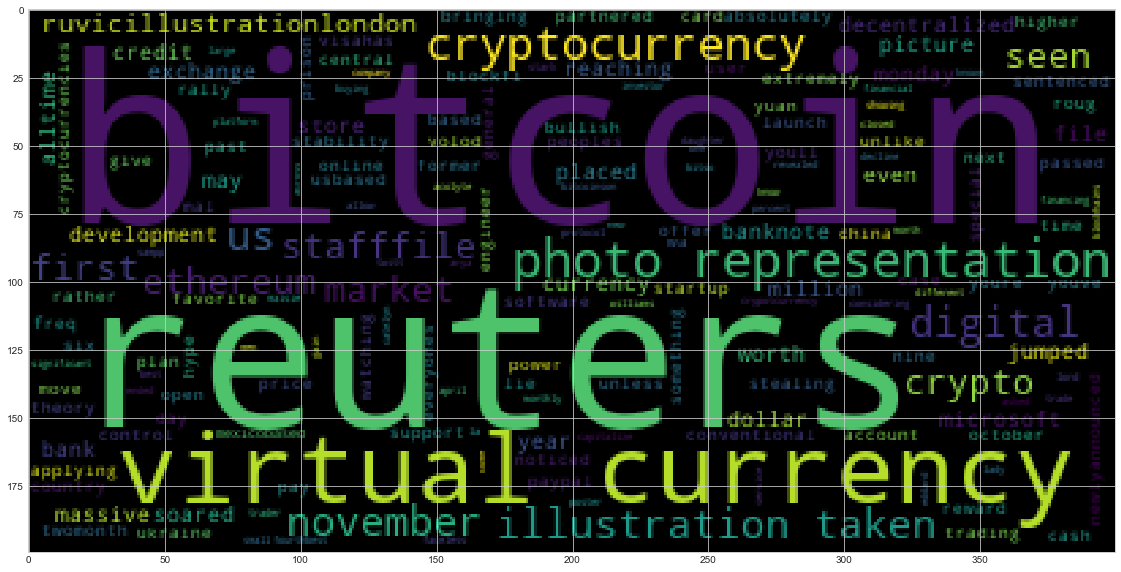

In [32]:
# Generate the Bitcoin word cloud
btc_wc = WordCloud().generate(btc_big_string)
plt.imshow(btc_wc)

In [33]:
# Convert a list of tokens into a single string of tokens
eth_big_string = ' '.join([str(elem) for elem in eth_flat_word_tokenized_list ])
print(eth_big_string)

paypal bringing newlyannounced support cryptocurrency us account first plan open cryptocurrency trading usbased user october wa file photo representation ethereum virtual currency standing pc motherboard seen illustration picture february ruvicillustrationlondon reuters file photo representation ethereum virtual currency standing pc motherboard seen illustration picture february ruvicillustrationlondon reuters london reuters digital currency ethereum xrp soared monday gaining momentum bitcoin powered towards alltime highfile photo representation ethereum virtual currency new york reuters institutional investor pumped million cryptocurrency fund product ended dec second highest record pushing sector asset manag new york reuters institutional investor pumped million cryptocurrency fund product ended dec second highest record pushing sector asset manag paypal launched generosity network platform allows user create customized personal fundraising campaign yes like gofundmeyou raise maximum

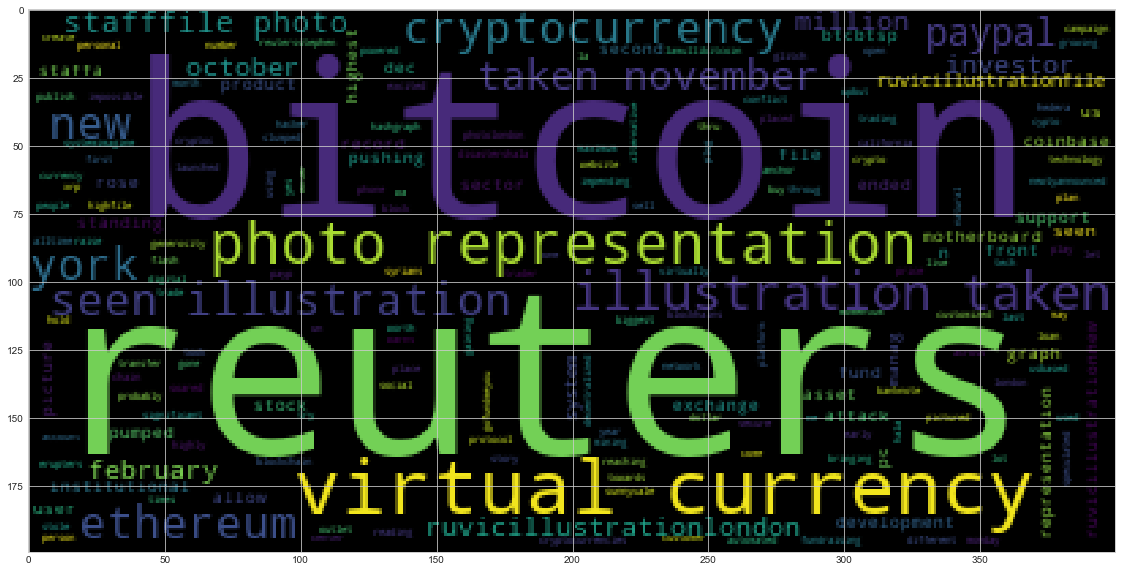

In [34]:
# Generate the Ethereum word cloud
eth_wc = WordCloud().generate(eth_big_string)
plt.imshow(eth_wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [35]:
import spacy
from spacy import displacy

In [36]:
# Optional - download a language model for SpaCy
# !python -m spacy download en_core_web_sm

In [37]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [38]:
# Concatenate all of the Bitcoin text together

# Compile the list of lists of texts for each Bitcoin article
btc_text = []
for text in bitcoin_df.text:
    btc_text.append(text)
    
# Convert a list of texts into a single string of texts   
btc_text_string = ' '.join([str(elem) for elem in btc_text])
print(btc_text_string)

A former Microsoft software engineer from Ukraine has been sentenced to nine years in prison for stealing more than $10 million in store credit from Microsoft's online store. From 2016 to 2018, Volod… [+3307 chars] Visa has partnered with cryptocurrency startup BlockFi to offer the first rewards credit card that pays out in Bitcoin rather than cash, but is it worth applying for? Unless youre extremely bullish o… [+2239 chars] PayPal is bringing its newly-announced support for cryptocurrency to all US accounts. It first announced plans to open cryptocurrency trading to US-based users in October, but until now it was only a… [+589 chars] In November 2017, after an absolutely massive, two-month rally, Bitcoin passed $10,000 for the first time. And then, over the next 20 days, it soared even higher, reaching a price of $19,665 and roug… [+6738 chars] Unlike ‘conventional’ cryptocurrencies, a central bank controls digital yuan — in this case, the People’s Bank of China. The move gives the c

In [39]:
# Run the NER processor on all of the text
btc_doc = nlp(btc_text_string)

In [40]:
# Add a title to the document
btc_doc.user_data["title"] = "Bitcoin NER"

In [41]:
# Render the visualization
displacy.render(btc_doc, style='ent')

In [42]:
# List all Entities
# Get geopolitical and organizational entities
btc_entities = [ent.text for ent in btc_doc.ents if ent.label_ in ['GPE', 'ORG']]
print(btc_entities)

['Microsoft', 'Ukraine', 'Microsoft', 'Visa', 'Bitcoin', 'US', 'US', 'Bitcoin', 'digital yuan', 'the People’s Bank of China', 'bitcoin', 'digital', 'hype', 'Mexico', 'Decentralized', 'U.S.', 'Bitcoin', 'Bitcoin', 'REUTERS/', 'Justin HarperBusiness', 'BBC News', 'Bitcoin', 'Bitcoin', 'Reuters', 'Bitcoin', 'REUTERS/Dado Ruvic/Illustration', 'Reuters', 'Bitcoin', 'REUTERS/', 'Reuters', 'LONDON', 'Reuters', 'XRP', 'Reuters', 'Bitcoin', 'U.S.', 'REUTERS/', 'Reuters', 'Reuters', 'Bitcoin', 'U.S.', 'REUTERS/', 'Reuters']


---

### Ethereum NER

In [43]:
# Concatenate all of the Ethereum text together

# Compile the list of lists of texts for each Bitcoin article
eth_text = []
for text in ethereum_df.text:
    eth_text.append(text)
    
# Convert a list of texts into a single string of texts   
eth_text_string = ' '.join([str(elem) for elem in eth_text])
print(eth_text_string)

PayPal is bringing its newly-announced support for cryptocurrency to all US accounts. It first announced plans to open cryptocurrency trading to US-based users in October, but until now it was only a… [+589 chars] FILE PHOTO: Representation of the Ethereum virtual currency standing on the PC motherboard is seen in this illustration picture, February 3, 2018. REUTERS/Dado Ruvic/Illustration
LONDON (Reuters) - … [+1237 chars] FILE PHOTO: Representation of the Ethereum virtual currency standing on the PC motherboard is seen in this illustration picture, February 3, 2018. REUTERS/Dado Ruvic/Illustration
LONDON (Reuters) - … [+1237 chars] LONDON (Reuters) - Digital currencies Ethereum and XRP soared on Monday, gaining momentum as bitcoin powered on towards its all-time high.
FILE PHOTO: Representation of the Ethereum virtual currency… [+1950 chars] NEW YORK (Reuters) - Institutional investors pumped $429 million into cryptocurrency funds and products for the week ended Dec. 7, the second hi

In [44]:
# Run the NER processor on all of the text
eth_doc = nlp(eth_text_string)

# Add a title to the document
# YOUR CODE HERE!
eth_doc.user_data["title"] = "Ethereum NER"

In [45]:
# Render the visualization
displacy.render(eth_doc, style='ent')

In [46]:
# List all Entities
eth_entities = [ent.text for ent in eth_doc.ents if ent.label_ in ['GPE', 'ORG']]
print(eth_entities)

['US', 'US', 'REUTERS/', 'Reuters', 'REUTERS/', 'Reuters', 'LONDON', 'Reuters', 'XRP', 'Reuters', 'Reuters', 'the Generosity Network', 'Reuters', 'Bitcoin', 'REUTERS/', 'Reuters', 'Bitcoin', 'REUTERS/', 'The New York Times', 'Coinbase', 'Reuters', 'Bitcoin', 'REUTERS/', 'Reuters', 'Reuters', 'Bitcoin', 'REUTERS/', 'Reuters', 'Reuters', 'Bitcoin', 'U.S.', 'REUTERS/', 'Reuters', 'Reuters', 'Bitcoin', 'REUTERS/', 'LONDON', 'Reuters', 'Bitcoin', 'Hala Systems', 'Hedera', 'Hala Systems', 'Bitcoin', 'Ethereum', 'bitcoin', 'Bitcoin', 'the Plug and Play Tech Center', 'Sunnyvale', 'California', 'REUTERS/Stephen Lam', 'Bitcoin']


---